# IMDB Movies Dataset: Trends in Revenue, Ratings, and Runtime Analysis 

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
data= pd.read_csv('IMDB-Movie-Data.csv')

# 1. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [396]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  1000
Number of columns:  12


# 2. Getting Information About Our Dataset and requirements

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 3. Check Missing Values In The Dataset

In [398]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

# 4. Drop All The  Missing Values

In [399]:
data.dropna(inplace=True)
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

# 5. Check For Duplicate Data


In [402]:
dup= data.duplicated().any()
print("Is there any duplicate value ? ", dup)

Is there any duplicate value ?  False


# 6. Get Overall Statistics About The DataFrame

In [403]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


# 7. Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes


In [404]:
Title_new= data[data['Runtime (Minutes)'] >= 180]['Title']
Title_new

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

# 8. In Which Year There Was The Highest Average Voting?


In [405]:
High_votes= data.groupby('Year')['Votes'].mean().sort_values(ascending=False)
High_votes

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

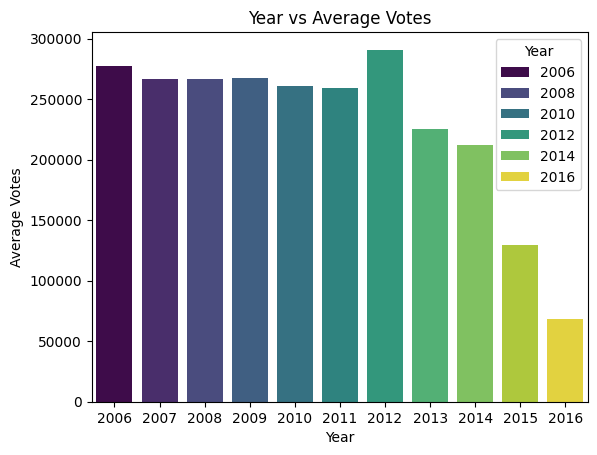

In [406]:
sns.barplot(x=High_votes.index, y=High_votes.values, palette='viridis', hue=High_votes.index)
plt.xlabel('Year')
plt.ylabel('Average Votes')
plt.title('Year vs Average Votes')
plt.show()

# 9. In Which Year There Was The Highest Average Revenue?


In [407]:
High_rev= data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)
High_rev

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

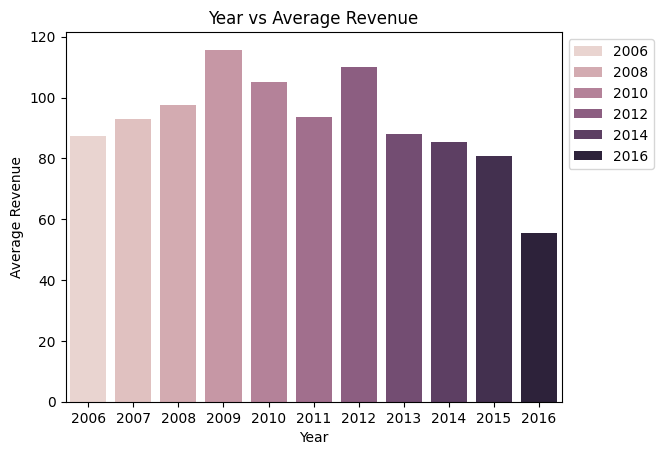

In [408]:
sns.barplot(x= High_rev.index, y=High_rev.values, hue= High_rev.index)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.title('Year vs Average Revenue')
plt.show()

# 10. Find The Average Rating For Each Director


In [409]:
Dir_rating= data.groupby('Director')['Rating'].mean()
Dir_rating

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam McKay             7.00
Adam Shankman          6.30
Adam Wingard           5.90
                       ... 
Xavier Dolan           8.10
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 524, dtype: float64

# 11. Display Top 10 Lengthy Movies Title and Runtime

In [410]:
Top_10= data[['Title', 'Runtime (Minutes)']].sort_values(by='Runtime (Minutes)', ascending=False).head(10)  
Top_10

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
75,Pirates of the Caribbean: At World's End,169
36,Interstellar,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
991,Taare Zameen Par,165


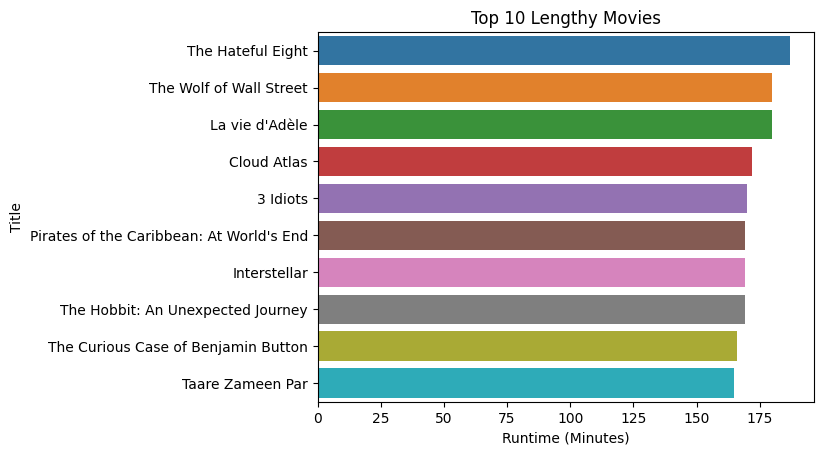

In [411]:
sns.barplot(x= Top_10['Runtime (Minutes)'], y= Top_10['Title'], hue= Top_10['Title'])  
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Title')
plt.title('Top 10 Lengthy Movies')
plt.show()

# 12. Display Number of Movies Per Year

In [413]:
data.groupby('Year')['Title'].count()

Year
2006     41
2007     44
2008     48
2009     45
2010     57
2011     57
2012     62
2013     84
2014     93
2015    109
2016    198
Name: Title, dtype: int64

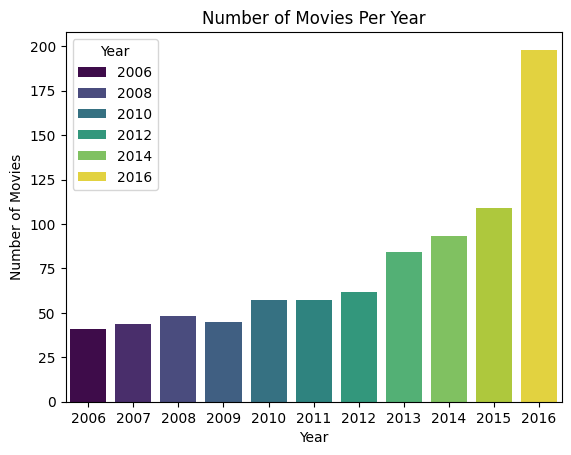

In [414]:
sns.countplot(x= data['Year'], palette='viridis', hue= data['Year'])
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Per Year')
plt.show()

# 13. Find Most Popular Movie Title (Highest Revenue)

In [416]:
Highest_Revenue= data[['Title', 'Revenue (Millions)']].sort_values(by= 'Revenue (Millions)', ascending= False).head(10)
Highest_Revenue

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


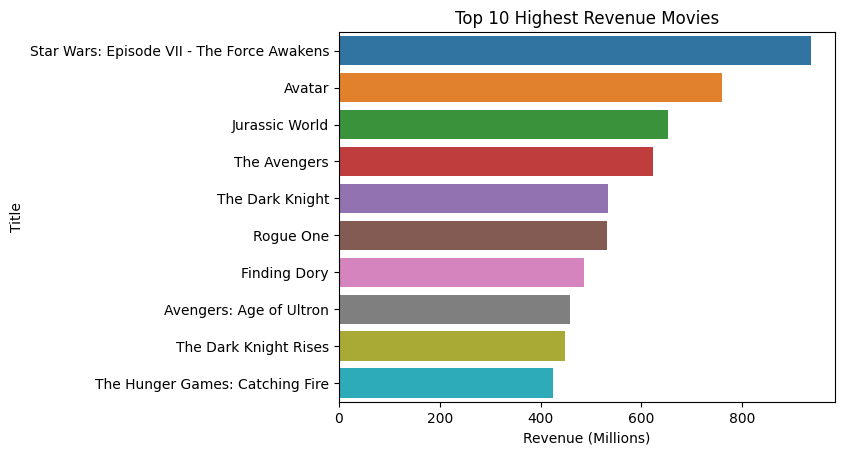

In [417]:
sns.barplot(x= Highest_Revenue['Revenue (Millions)'], y= Highest_Revenue['Title'], hue= Highest_Revenue['Title'])
plt.xlabel('Revenue (Millions)')
plt.ylabel('Title')
plt.title('Top 10 Highest Revenue Movies')
plt.show()

# 14. Display Top 10 Highest Rated Movie Titles And its Directors

In [419]:
Title_Dir_Ratings= data[['Title', 'Director', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
Title_Dir_Ratings

,Title,Director,Rating
54,The Dark Knight,Christopher Nolan,9.0
80,Inception,Christopher Nolan,8.8
36,Interstellar,Christopher Nolan,8.6
96,Kimi no na wa,Makoto Shinkai,8.6
249,The Intouchables,Olivier Nakache,8.6
124,The Dark Knight Rises,Christopher Nolan,8.5
99,The Departed,Martin Scorsese,8.5
64,The Prestige,Christopher Nolan,8.5
991,Taare Zameen Par,Aamir Khan,8.5
476,The Lives of Others,Florian Henckel von Donnersmarck,8.5


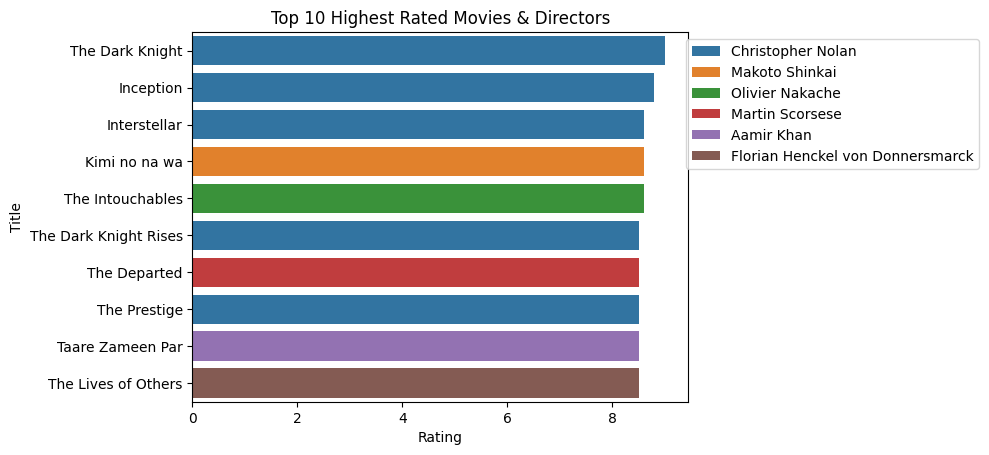

In [420]:
sns.barplot(x= Title_Dir_Ratings['Rating'], y= Title_Dir_Ratings['Title'], hue= Title_Dir_Ratings['Director'])
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.xlabel('Rating')
plt.ylabel('Title')
plt.title('Top 10 Highest Rated Movies & Directors')
plt.show()


# 15. Display Top 10 Highest Revenue Movie Titles

In [422]:
Highest_Revenue_Titles= data[['Title', 'Revenue (Millions)']].sort_values(by='Revenue (Millions)', ascending=False).head(10)
Highest_Revenue_Titles

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


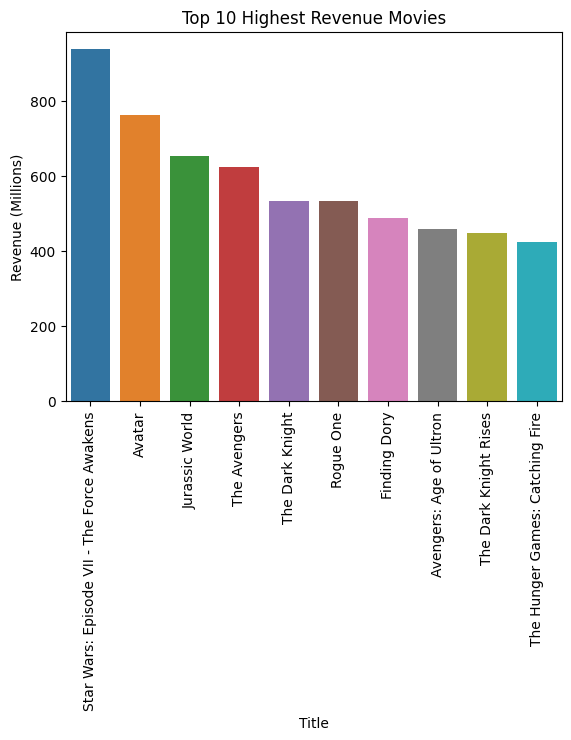

In [426]:
sns.barplot(x= Highest_Revenue_Titles['Title'], y= Highest_Revenue_Titles['Revenue (Millions)'], hue= Highest_Revenue_Titles['Title'])
plt.xticks(rotation=90)
plt.title('Top 10 Highest Revenue Movies')
plt.show()

# 16.  Find Average Rating of Movies Year Wise

In [428]:
Avg_rating_perYear= data.groupby('Year')['Rating'].mean()
Avg_rating_perYear

Year
2006    7.143902
2007    7.140909
2008    6.708333
2009    6.911111
2010    6.894737
2011    6.945614
2012    6.933871
2013    6.832143
2014    6.822581
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

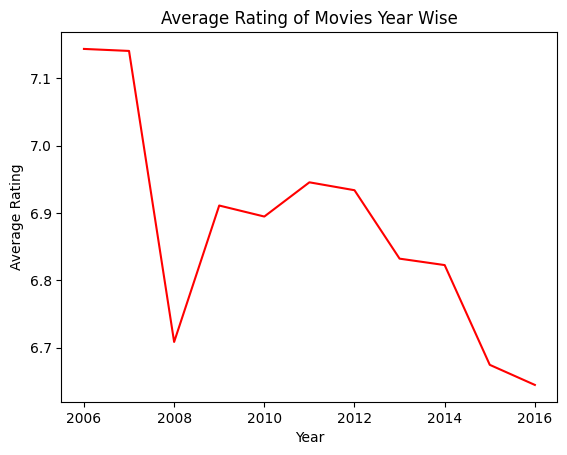

In [429]:
Avg_rating_perYear.plot(kind='line', color='red', title='Average Rating of Movies Year Wise')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# 17. Classify Movies Based on Ratings [Excellent, Good, and Average]

In [432]:
def rating(Rating):
    if Rating >= 8:
        return 'Excellent'
    elif Rating >= 6:
        return 'Good'
    else:
        return 'Average'
    
data['Rating_category'] = data['Rating'].apply(rating)
data.value_counts('Rating_category')

Rating_category
Good         640
Average      128
Excellent     70
Name: count, dtype: int64

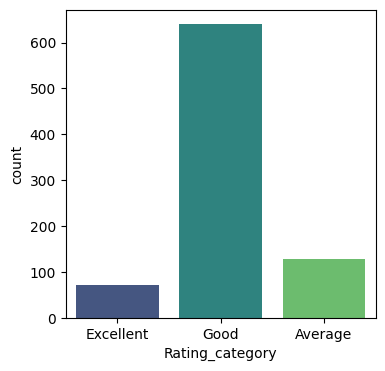

In [434]:
figure= plt.figure(figsize=(4, 4))
sns.countplot(x=data['Rating_category'], palette='viridis', hue=data['Rating_category'])
plt.show()

# 18. Count Number of Action Movies

In [437]:
No_ActionMovies= len(data[data['Genre'].str.contains('Action', case=False)])
print("Number of Action movies is ", No_ActionMovies)

Number of Action movies is  277


# 19. Find Unique Values From Genre 

In [443]:

list1= []
for value in data['Genre']:
    list1.append(value.split(','))

oned_list= []
for item in list1:
    for i in item:
        oned_list.append(i)

unique_list= []
for i in oned_list:
    if i not in unique_list:
        unique_list.append(i)   

unique_list


['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

# 20. How Many Films of Each Genre Were Made?

In [444]:
oned_list
from collections import Counter
Total_Genres= Counter(oned_list)
Total_Genres= pd.DataFrame(Total_Genres.items(), columns=['Genre', 'Total'])
Total_Genres

,Genre,Total
0,Action,277
1,Adventure,244
2,Sci-Fi,107
3,Mystery,86
4,Horror,87
5,Thriller,148
6,Animation,45
7,Comedy,250
8,Family,48
9,Fantasy,92


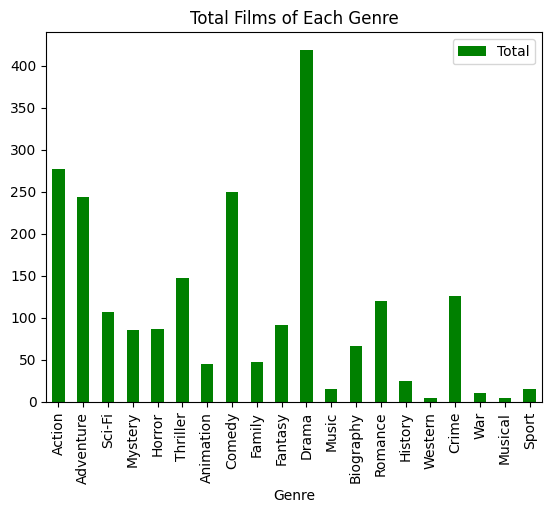

In [446]:
Total_Genres.plot(kind='bar', x='Genre', y='Total', color='green', title='Total Films of Each Genre')
plt.show()